# Statistical Analysis

#### Questions I want to answer:
1. MLE - What is the distribution of price per bedroom in Austin - is it normally distributed?  What about Nashville?
2. One-tailed t-test - Does Austin have a statistically significant advantage over Nashville in terms of Airbnb Nightly Price Per Bedroom?
3. Does a 3-bedroom house have a statistically higher price per bedroom than a 1 bedroom house/condo?  Would need to specify location, full house (not just private room)  What about a 5-bedroom house compared to a 3 bedroom house?
4. Does a downtown (certain zip codes) 1-bed, 1-bath full house earn more than an outside of downtown (certain zip codes) when normalized for price per square foot of the price of the house?  What about a 3-2?

#### Further Study:
1. Is Airbnb price more correlated with bedrooms, baths, beds, or number of people accommodated?
2. Is Airbnb price correlated with house price per square foot?
3. Create a model that predicts Airbnb nightly rental price based on location and bedrooms.  
4. Web app that takes in MLS data and houses on the market and rates each house based on Airbnb viability.

In [1]:
%run src/imports.py

In [3]:
plt.style.use('ggplot')

In [4]:
Austin_df = pd.read_pickle('data/Austin/city_listings_combAustin.pkl')

In [5]:
Nashville_df = pd.read_pickle('data/Nashville/city_listings_combNashville.pkl')

In [6]:
Boston_df = pd.read_pickle('data/Boston/city_listings_combBoston.pkl')

In [7]:
SF_df = pd.read_pickle('data/San Francisco/city_listings_combSan Francisco.pkl')

### 1. What is the Distribution of "Airbnb Nightly Price Per Bedroom" in Austin?  
Can we assume that it is normally distributed?  What are the parameters of the distribution?

----

### 2. Does Austin Have a Statistically Significant Advantage of Airbnb Nightly Price Per Bedroom Over Nashville?
What about SF, Boston?
One-tailed t-test

-----

### 3. Does a 3-bedroom house have a statistically significant higher Airbnb Nightly Price Per Bedroom over a 1-bedroom house or condo?
What about a 5 bedroom house compared to a 3 bedroom house
Two-tailed t-tests

Steps:
1. Assume the means and stdevs are normally distributed
2. Take bootstrap samples to get a normal distribution of the means and standard deviations
3. Use a t-test to compare the means

In [8]:
Austin1df = Austin_df[Austin_df['bedrooms'] == 1]
Austin3df = Austin_df[Austin_df['bedrooms'] == 3]
Austin4df = Austin_df[Austin_df['bedrooms'] == 4]
Austin5df = Austin_df[Austin_df['bedrooms'] == 5]
Austinbigdf = Austin_df[Austin_df['bedrooms'] > 5]

#### **Null Hypothesis:** The mean Airbnb Nightly Price Per Bedroom is the same or less for a 3 bedroom house than a 1 bedroom house.
#### **Alternate Hypothesis:** The mean Airbnb Nightly Price Per Bedroom is more for a 3 bedroom house than a 1 bedroom house.


In [9]:
def bootstrap_sample_means(data, n_bootstrap_samples=10000):
    bootstrap_sample_means = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(np.mean(bootstrap_sample))
    return np.asarray(bootstrap_sample_means)

In [10]:
Austin1dfmeans = bootstrap_sample_means(Austin1df['PricePerBedrooms'])
Austin3dfmeans = bootstrap_sample_means(Austin3df['PricePerBedrooms'])
Austin4dfmeans = bootstrap_sample_means(Austin4df['PricePerBedrooms'])
Austin5dfmeans = bootstrap_sample_means(Austin5df['PricePerBedrooms'])
Austinbigdfmeans = bootstrap_sample_means(Austinbigdf['PricePerBedrooms'])

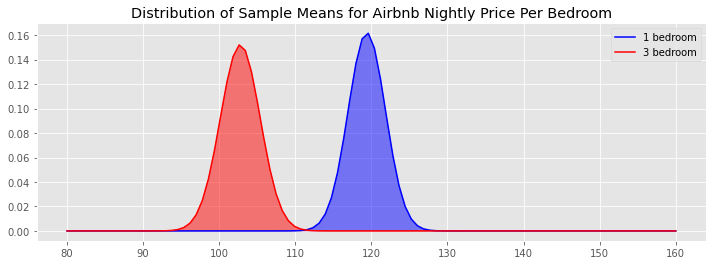

In [12]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
onebed = stats.norm(Austin1dfmeans.mean(), Austin1dfmeans.std())
threebed = stats.norm(Austin3dfmeans.mean(), Austin3dfmeans.std())

# Creating a new array to use for x-axis. 
support = np.linspace(80, 160, 100)

# call the probability density functions for each of the points on the x axis. 
onebed_pdf = onebed.pdf(support)
threebed_pdf = threebed.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, onebed_pdf, color='blue', label='1 bedroom')
ax.fill(support, onebed_pdf, color='blue', alpha=0.5)
ax.plot(support, threebed_pdf, color='red', label='3 bedroom')
ax.fill(support, threebed_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom. 
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Means for Airbnb Nightly Price Per Bedroom");

T test notes:
- Student's t-test should not be used because we cannot assume that the variances of the two samples are equal.
- 

In [13]:
# ttest in scipy is two sided.
print("Welch's t-test:")
print(stats.ttest_ind(Austin1dfmeans, Austin3dfmeans, equal_var=False))
print()
# 
print("Mann-Whitney U test:")
print(stats.mannwhitneyu(Austin1dfmeans, Austin3dfmeans, alternative = 'less'))

Welch's t-test:
Ttest_indResult(statistic=462.6414899261147, pvalue=0.0)

Mann-Whitney U test:
MannwhitneyuResult(statistic=99999977.0, pvalue=1.0)


----

#### **Null Hypothesis:** The median Airbnb Nightly Price Per Bedroom is the same or less for a 3 bedroom house than a 1 bedroom house.
#### **Alternate Hypothesis:** The median Airbnb Nightly Price Per Bedroom is more for a 3 bedroom house than a 1 bedroom house.


In [14]:
def bootstrap_sample_medians(data, n_bootstrap_samples=10000):
    bootstrap_sample_medians = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_medians.append(np.median(bootstrap_sample))
    return np.asarray(bootstrap_sample_medians)

In [15]:
Austin1dfmedians = bootstrap_sample_medians(Austin1df['PricePerBedrooms'])
Austin3dfmedians = bootstrap_sample_medians(Austin3df['PricePerBedrooms'])
Austin4dfmedians = bootstrap_sample_medians(Austin4df['PricePerBedrooms'])
Austin5dfmedians = bootstrap_sample_medians(Austin5df['PricePerBedrooms'])
Austinbigdfmedians = bootstrap_sample_medians(Austinbigdf['PricePerBedrooms'])

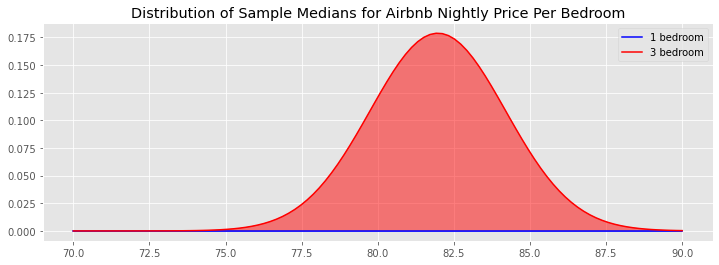

In [16]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
onebed = stats.norm(Austin1dfmedians.mean(), Austin1dfmedians.std())
threebed = stats.norm(Austin3dfmedians.mean(), Austin3dfmedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(70, 90, 100)

# call the probability density functions for each of the points on the x axis. 
onebed_pdf = onebed.pdf(support)
threebed_pdf = threebed.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, onebed_pdf, color='blue', label='1 bedroom')
ax.fill(support, onebed_pdf, color='blue', alpha=0.5)
ax.plot(support, threebed_pdf, color='red', label='3 bedroom')
ax.fill(support, threebed_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Medians for Airbnb Nightly Price Per Bedroom");

In [17]:
# ttest in scipy is two sided.
print("Welch's t-test:")
print(stats.ttest_ind(Austin1dfmedians, Austin3dfmedians, equal_var=False))
print()
# 
print("Mann-Whitney U test:")
print(stats.mannwhitneyu(Austin1dfmedians, Austin3dfmedians, alternative = 'less'))

Welch's t-test:
Ttest_indResult(statistic=768.0715158187179, pvalue=0.0)

Mann-Whitney U test:
MannwhitneyuResult(statistic=100000000.0, pvalue=1.0)


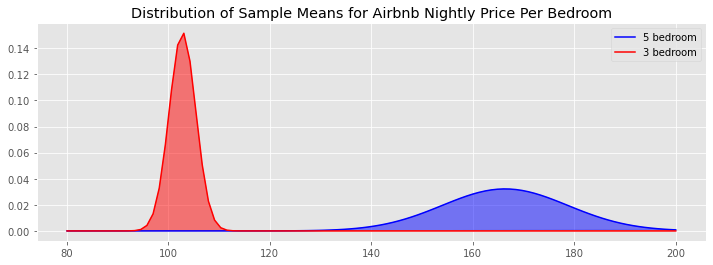

In [18]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
threebed = stats.norm(Austin3dfmeans.mean(), Austin3dfmeans.std())
fivebed = stats.norm(Austin5dfmeans.mean(), Austin5dfmeans.std())

# Creating a new array to use for x-axis. 
support = np.linspace(80, 200, 100)

# call the probability density functions for each of the points on the x axis. 
fivebed_pdf = fivebed.pdf(support)
threebed_pdf = threebed.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, fivebed_pdf, color='blue', label='5 bedroom')
ax.fill(support, fivebed_pdf, color='blue', alpha=0.5)
ax.plot(support, threebed_pdf, color='red', label='3 bedroom')
ax.fill(support, threebed_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Means for Airbnb Nightly Price Per Bedroom");

In [19]:
# ttest in scipy is two sided.
print("Welch's t-test:")
print(stats.ttest_ind(Austin3dfmeans, Austin5dfmeans, equal_var=False))
print()
# 
print("Mann-Whitney U test:")
print(stats.mannwhitneyu(Austin3dfmeans, Austin5dfmeans, alternative = 'less'))

Welch's t-test:
Ttest_indResult(statistic=-501.8627038536387, pvalue=0.0)

Mann-Whitney U test:
MannwhitneyuResult(statistic=0.0, pvalue=0.0)


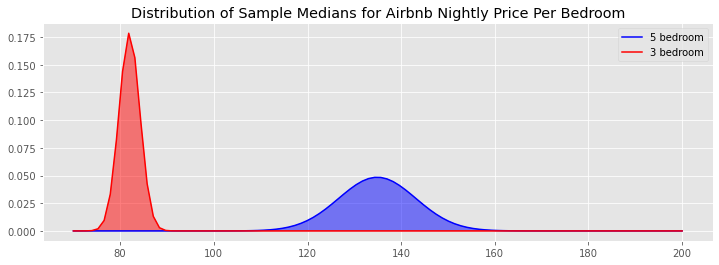

In [20]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
threebed = stats.norm(Austin3dfmedians.mean(), Austin3dfmedians.std())
fivebed = stats.norm(Austin5dfmedians.mean(), Austin5dfmedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(70, 200, 100)

# call the probability density functions for each of the points on the x axis. 
fivebed_pdf = fivebed.pdf(support)
threebed_pdf = threebed.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, fivebed_pdf, color='blue', label='5 bedroom')
ax.fill(support, fivebed_pdf, color='blue', alpha=0.5)
ax.plot(support, threebed_pdf, color='red', label='3 bedroom')
ax.fill(support, threebed_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Medians for Airbnb Nightly Price Per Bedroom");

In [21]:
# ttest in scipy is two sided.
print("Welch's t-test:")
print(stats.ttest_ind(Austin3dfmedians, Austin5dfmedians, equal_var=False))
print()
# 
print("Mann-Whitney U test:")
print(stats.mannwhitneyu(Austin3dfmedians, Austin5dfmedians, alternative = 'less'))

Welch's t-test:
Ttest_indResult(statistic=-620.3775102963664, pvalue=0.0)

Mann-Whitney U test:
MannwhitneyuResult(statistic=0.0, pvalue=0.0)


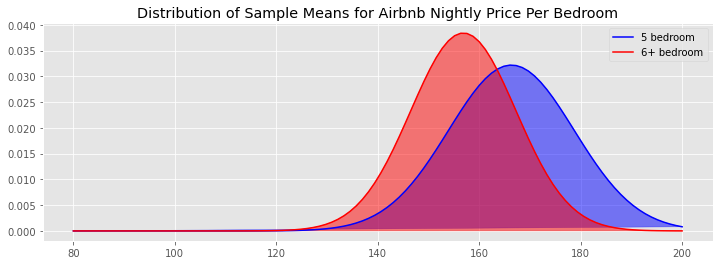

In [22]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
fivebed = stats.norm(Austin5dfmeans.mean(), Austin5dfmeans.std())
bigbed = stats.norm(Austinbigdfmeans.mean(), Austinbigdfmeans.std())

# Creating a new array to use for x-axis. 
support = np.linspace(80, 200, 100)

# call the probability density functions for each of the points on the x axis. 
fivebed_pdf = fivebed.pdf(support)
bigbed_pdf = bigbed.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, fivebed_pdf, color='blue', label='5 bedroom')
ax.fill(support, fivebed_pdf, color='blue', alpha=0.5)
ax.plot(support, bigbed_pdf, color='red', label='6+ bedroom')
ax.fill(support, bigbed_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Means for Airbnb Nightly Price Per Bedroom");

In [23]:
# ttest in scipy is two sided.
print("Welch's t-test:")
print(stats.ttest_ind(Austin5dfmeans, Austinbigdfmeans, equal_var=False))
print()
# 
print("Mann-Whitney U test:")
print(stats.mannwhitneyu(Austin5dfmeans, Austinbigdfmeans, alternative = 'less'))

Welch's t-test:
Ttest_indResult(statistic=58.50293222108261, pvalue=0.0)

Mann-Whitney U test:
MannwhitneyuResult(statistic=71642999.0, pvalue=1.0)


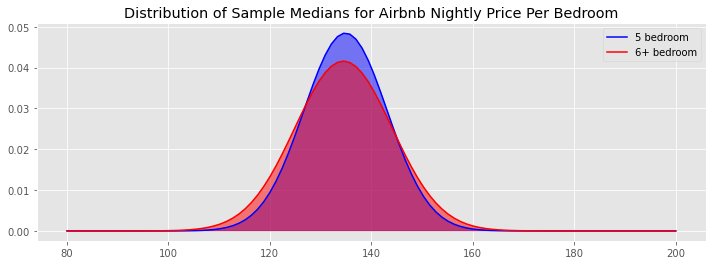

In [24]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
fivebed = stats.norm(Austin5dfmedians.mean(), Austin5dfmedians.std())
bigbed = stats.norm(Austinbigdfmedians.mean(), Austinbigdfmedians.std())

# Creating a new array to use for x-axis. 
support = np.linspace(80, 200, 100)

# call the probability density functions for each of the points on the x axis. 
fivebed_pdf = fivebed.pdf(support)
bigbed_pdf = bigbed.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, fivebed_pdf, color='blue', label='5 bedroom')
ax.fill(support, fivebed_pdf, color='blue', alpha=0.5)
ax.plot(support, bigbed_pdf, color='red', label='6+ bedroom')
ax.fill(support, bigbed_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Medians for Airbnb Nightly Price Per Bedroom");

In [25]:
# ttest in scipy is two sided.
print("Welch's t-test:")
print(stats.ttest_ind(Austin5dfmedians, Austinbigdfmedians, equal_var=False))
print()
# 
print("Mann-Whitney U test:")
print(stats.mannwhitneyu(Austin5dfmedians, Austinbigdfmedians, alternative = 'less'))

Welch's t-test:
Ttest_indResult(statistic=3.1449284137431914, pvalue=0.0016637631052361045)

Mann-Whitney U test:
MannwhitneyuResult(statistic=53071622.0, pvalue=0.9999999999999744)


### Plotting mean distributions for 1, 3, 4, 5, and 6+ bed houses

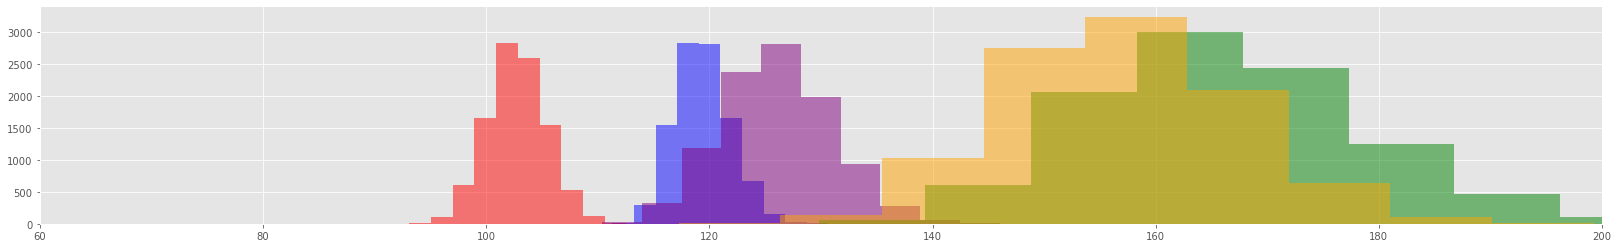

In [26]:
fig,ax = plt.subplots(figsize=(28,4))

# X axis
support = np.linspace(70,90,100)

# Plot median histograms against each other
ax.hist(Austin1dfmeans,color='blue',label='1 bedroom',alpha=0.5)
ax.hist(Austin3dfmeans,color='red',label='3 bedroom',alpha=0.5)
ax.hist(Austin4dfmeans,color='purple',label='4 bedroom',alpha=0.5)
ax.hist(Austin5dfmeans,color='green',label='5 bedroom',alpha=0.5)
ax.hist(Austinbigdfmeans,color='orange',label='6+ bedroom',alpha=0.5)
ax.set_xlim(60,200);


### Plotting median distributions for 1, 3, 4, 5, and 6+ bed houses

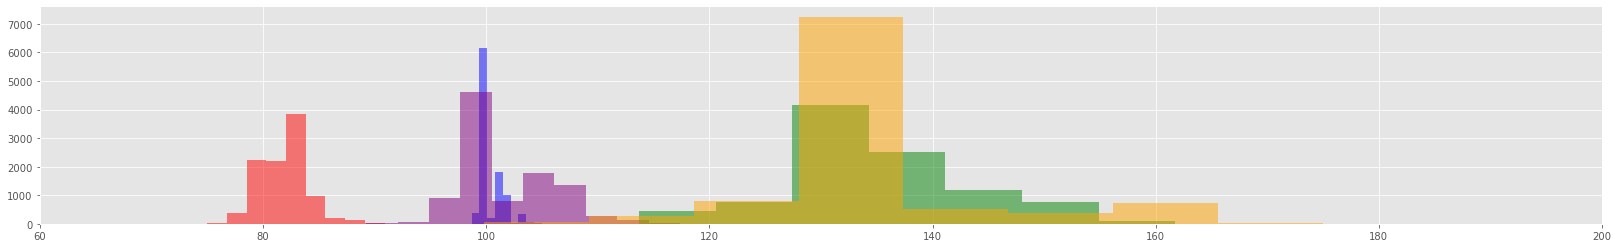

In [27]:
fig,ax = plt.subplots(figsize=(28,4))

# X axis
support = np.linspace(70,90,100)

# Plot median histograms against each other
ax.hist(Austin1dfmedians,color='blue',label='1 bedroom',alpha=0.5)
ax.hist(Austin3dfmedians,color='red',label='3 bedroom',alpha=0.5)
ax.hist(Austin4dfmedians,color='purple',label='4 bedroom',alpha=0.5)
ax.hist(Austin5dfmedians,color='green',label='5 bedroom',alpha=0.5)
ax.hist(Austinbigdfmedians,color='orange',label='6+ bedroom',alpha=0.5)
ax.set_xlim(60,200);


----

### 4. Does a downtown (certain zip codes) 1-bed, 1-bath full house earn more than an outside of downtown (certain zip codes) when normalized for price per square foot of the price of the house?  What about a 3-2?

Zip codes included in downtown: 78701, 78702, 78703, 78705

Price per sqft info was entered manually from propstream.com

In [28]:
AUSppsf_zips = pd.read_pickle('data/AUSppsf_df.pkl')
AUSppsf_zips.rename(columns={'zip':'neighbourhood'},inplace=True)

In [29]:
AUSppsf_zips[AUSppsf_zips['neighbourhood'] == 78731]

,neighbourhood,mean_ppsf
18,78731,303


In [30]:
Austin_df_with_ppsf = pd.merge(Austin_df,AUSppsf_zips,on='neighbourhood',how='left')

In [31]:
Austin_df_with_ppsf['RentalPriceOverPPSF'] = Austin_df_with_ppsf['price'] / Austin_df_with_ppsf['mean_ppsf']

Grouping by zip codes:

In [32]:
zip_codes_series = Austin_df_with_ppsf['neighbourhood']

In [33]:
Zips = Austin_df_with_ppsf.set_index('neighbourhood')

In [34]:
Zips.index.nunique()

42

Getting list of downtown zip codes and outside of downtown zip codes

In [35]:
travis_zips = [78764,78768,78767,78772,78769,78783,78610,78613,78615,78617,78621,73301,73344,78641,78645,78652,78654,78653,78660,78664,78669,78691,78702,78701,78704,78703,78705,78709,78712,78713,78716,78719,78722,78721,78724,78723,78726,78725,78728,78727,78730,78732,78731,78734,78733,78736,78735,78738,78737,78741,78739,78744,78742,78746,78745,78748,78747,78750,78749,78752,78751,78754,78753,78756,78758,78757,78760,78759]

In [37]:
downtown_zips = [78701,78702,78703,78705]
outside_downtown_zips = [78764,78768,78767,78772,78769,78783,78610,78613,78615,78617,78621,73301,73344,78641,78645,78652,78654,78653,78660,78664,78669,78691,78704,78709,78713,78716,78719,78722,78721,78724,78723,78726,78725,78728,78727,78730,78732,78731,78734,78733,78736,78735,78738,78737,78741,78739,78744,78742,78746,78745,78748,78747,78750,78749,78752,78751,78754,78753,78756,78758,78757,78760,78759]
outside_downtown = set(zip_codes_series) & set(outside_downtown_zips)
outside_downtown = list(outside_downtown)

Making two separate dataframes: One for downtown, and one for outside of downtown

In [38]:
Downtown = Zips.loc[downtown_zips]

In [39]:
Outside_Downtown = Zips.loc[outside_downtown]

In [40]:
Outside_Downtown['RentalPriceOverPPSF'].describe()

count    2667.000000
mean        0.802365
std         1.052481
min         0.056818
25%         0.290733
50%         0.466667
75%         0.907204
max        13.586364
Name: RentalPriceOverPPSF, dtype: float64

Total number of listings in downtown zip codes versus other zip codes:

In [41]:
print('% downtown = {}%'.format(int((len(Downtown)/len(Zips))*100)))

% downtown = 31%


In [42]:
Austindowntownmedians = bootstrap_sample_medians(Downtown['RentalPriceOverPPSF'])
Austinothermedians = bootstrap_sample_medians(Outside_Downtown['RentalPriceOverPPSF'])

In [43]:
Austindowntownmeans = bootstrap_sample_means(Downtown['RentalPriceOverPPSF'])
Austinothermeans = bootstrap_sample_means(Outside_Downtown['RentalPriceOverPPSF'])

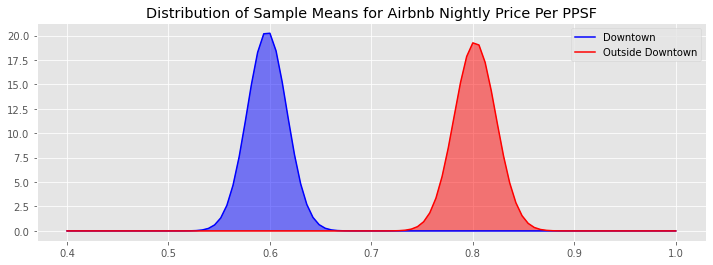

In [50]:
# Creating a plot
fig,ax = plt.subplots(figsize=(12,4))

# Creating normal distributions for sample means and sample mean standard deviations.
# So these are the sampling distributions for the sample mean.
downtown = stats.norm(Austindowntownmeans.mean(), Austindowntownmeans.std())
other = stats.norm(Austinothermeans.mean(), Austinothermeans.std())

# Creating a new array to use for x-axis. 
support = np.linspace(0.4, 1, 100)

# call the probability density functions for each of the points on the x axis. 
downtown_pdf = downtown.pdf(support)
other_pdf = other.pdf(support)

# Plot the density functions we just created and filling with color to show overlap.
# alpha here is transparency.
ax.plot(support, downtown_pdf, color='blue', label='Downtown')
ax.fill(support, downtown_pdf, color='blue', alpha=0.5)
ax.plot(support, other_pdf, color='red', label='Outside Downtown')
ax.fill(support, other_pdf, color='red', alpha=0.5)

# Legend - shows comparison between 1 bedroom and 3 bedroom.
# It draws from the 'label' argument in the plotting function.
# Also add a plot title.
ax.legend()
ax.set_title("Distribution of Sample Means for Airbnb Nightly Price Per PPSF");

In [45]:
Downtown['RentalPriceOverPPSF']

neighbourhood
78701.0    0.412371
78701.0    0.305842
78701.0    0.513746
78701.0    0.833333
78701.0    0.185567
             ...   
78705.0    0.192982
78705.0    0.238095
78705.0    0.626566
78705.0    0.270677
78705.0    0.596491
Name: RentalPriceOverPPSF, Length: 1225, dtype: float64

In [46]:
import json

In [47]:
with open('data/Austin/neighbourhoods.geojson') as response:
    zips = json.load(response)

In [48]:
zips['features'][0]['properties']['neighbourhood']

'78739'

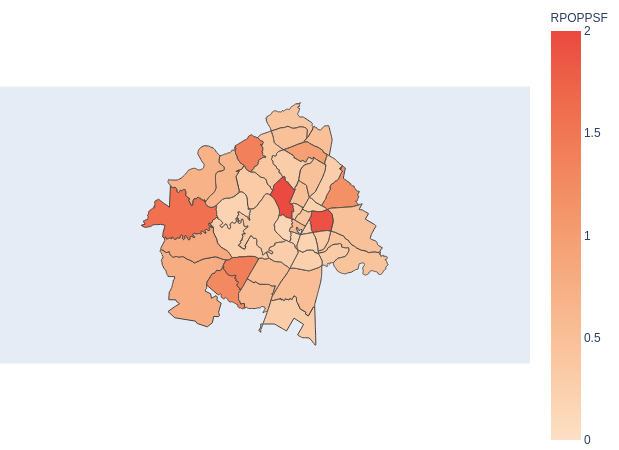

In [52]:
import plotly.express as px

fig = px.choropleth(Austin_df_with_ppsf, geojson=zips, locations='neighbourhood', featureidkey='properties.neighbourhood',color='RentalPriceOverPPSF',
                    color_continuous_scale="Peach",
                    range_color=(0,2),
                    scope="usa",
                    labels={'RentalPriceOverPPSF':'RPOPPSF'})
fig.update_geos(fitbounds='geojson')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()
pio.write_html(fig,file='chloro.html')

-----

-----

### Further Study

#### 1. What is the relationship (linear, exponential, etc...) between number of beds and Nightly Rental Price?

#### 2. Is Airbnb Nightly Rental Price more correlated with bedrooms, baths, beds, or number of people accommodated?

#### 3. Is Airbnb Nightly Rental Price correlated with house price per square foot?